In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from pandas.plotting import scatter_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [48]:
df=pd.read_csv('data/Train.csv')


In [76]:
df.dtypes

SalesID                              int64
SalePrice                            int64
MachineID                            int64
ModelID                              int64
datasource                           int64
auctioneerID                       float64
YearMade                             int64
MachineHoursCurrentMeter           float64
UsageBand                           object
saledate                    datetime64[ns]
fiModelDesc                         object
fiBaseModel                         object
fiSecondaryDesc                     object
fiModelSeries                       object
fiModelDescriptor                   object
ProductSize                         object
fiProductClassDesc                  object
state                               object
ProductGroup                        object
ProductGroupDesc                    object
Drive_System                        object
Enclosure                           object
Forks                               object
Pad_Type   

In [82]:
df.shape[0]

401125

In [50]:
#|raw_data['Mycol'] =  pd.to_datetime(raw_data['Mycol'], format='%d%b%Y:%H:%M:%S.%f')

df.saledate = pd.to_datetime(df.saledate)


In [83]:
df['saleyear'] = df.saledate.dt.year
df.saleyear.describe()
df.YearMade.describe()
df.YearMade.sort_values().unique()

array([1000, 1919, 1920, 1937, 1942, 1947, 1948, 1949, 1950, 1951, 1952,
       1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963,
       1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974,
       1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985,
       1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996,
       1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013])

### Looking at regression for YearMade

/home/rosina/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


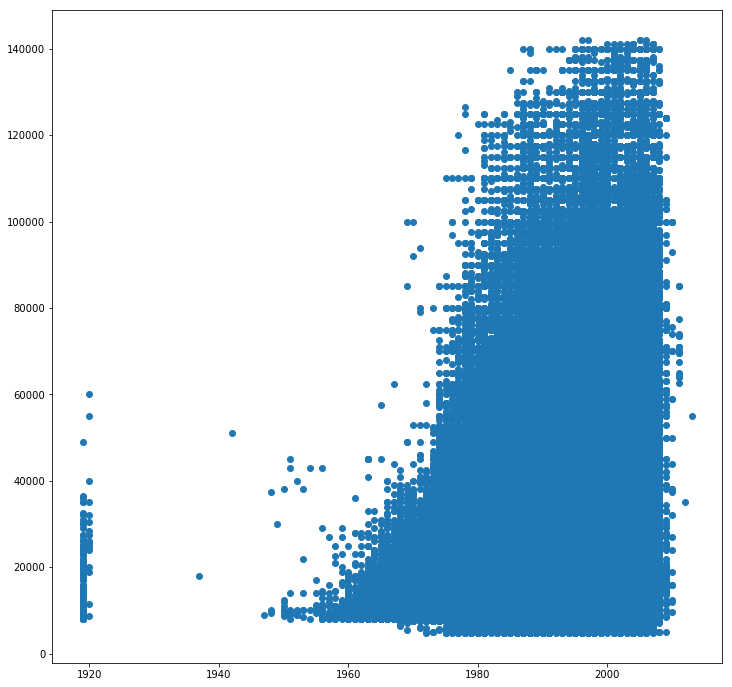

In [98]:
# Remove nonsensical values
df_reduce = df[df['YearMade']>1100]
                    

#Visualize
plt.figure(figsize=(12,12))
plt.scatter(X_train[:,1],y_train)
plt.show()

In [99]:
year_model = sm.OLS(y_train, X_train).fit()
year_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                 1.821e+04
Date:                Fri, 14 Jul 2017   Prob (F-statistic):               0.00
Time:                        11:51:30   Log-Likelihood:            -4.1579e+06
No. Observations:              362940   AIC:                         8.316e+06
Df Residuals:                  362938   BIC:                         8.316e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.022e+06   7811.973   -130.806      0.000   -1.04e+06   -1.01e+06
x1           528.6875      3.918    134.932      0.000     521.008     536.367
==============================================================================
Omnibus:                    82069.091   Durbin-Watson:                   0.567
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           164136.644
Skew:                           1.366   Prob(JB):                         0.00
Kurtosis:                       4.841   Cond. No.                     4.10e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.1e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
linear = LinearRegression()
fit = linear.fit(y_train, X_train)


Earliest sale year is 1989 and therefore earlier year made must also be 1989

In [70]:
df3 = df[df['YearMade'] >= 1900]
df3['saleage'] = df3.YearMade - df3.saleyear
df3['saleage'].describe()

/home/rosina/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


count    362940.000000
mean        -10.220477
std           7.569398
min         -92.000000
25%         -13.000000
50%          -8.000000
75%          -5.000000
max          12.000000
Name: saleage, dtype: float64

In [7]:

df2 = df[['SalePrice','MachineHoursCurrentMeter','Transmission']]
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
SalePrice,401125.0,31099.712848,23036.898502,4750.0,14500.0,24000.0,40000.0,142000.0
MachineHoursCurrentMeter,142765.0,3457.955353,27590.256413,0.0,0.0,0.0,3025.0,2483300.0


In [8]:
print df2['Transmission'].describe()
df2['Transmission'].value_counts()

count       183230
unique           8
top       Standard
freq        140328
Name: Transmission, dtype: object


Standard               140328
None or Unspecified     23147
Powershift              11731
Powershuttle             4244
Hydrostatic              3204
Direct Drive              418
Autoshift                 114
AutoShift                  44
Name: Transmission, dtype: int64

# Machine Hours Current Meter

In [9]:
df2.

SyntaxError: invalid syntax (<ipython-input-9-066a947a93b9>, line 1)

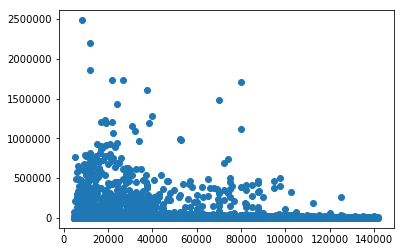

In [10]:
plt.scatter(df2.SalePrice, df2.MachineHoursCurrentMeter)
plt.show()